Μέρος 1ο

Χατζηχαραλάμπους Γεώργιος 03114709 <br/>
Βακαλοπούλου Μυρσίνη 03114308 <br/>
Ομάδα Α29

Η σωστή συνάρτηση είναι αυτή:
http://benchmarkfcns.xyz/benchmarkfcns/holdertablefcn.html

In [0]:
#Ορισμός της συνάρτησής μας

from math import *

def f1(x,y):
    return (-1*abs(sin(x)*cos(y)*exp(abs(1-sqrt(x**2+y**2)/pi))))

numVariables = 2

MIN:  -19.208502567767606


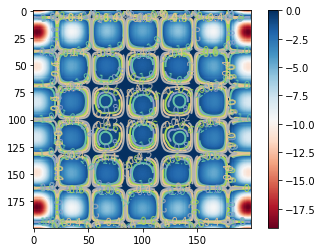

In [0]:
#Τυπώνουμε τη 2D κάτοψη της συνάρτησης
import numpy as np
from numpy import exp,arange,linspace
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import matplotlib.pyplot as plt
%matplotlib inline
 
x = arange(-10.0, 10.0, 0.1)
y = arange(-10.0, 10.0, 0.1)
X,Y = meshgrid(x, y) # grid of point

Z=[]

for i in range(len(x)):
    new_list = []
    Z.append(new_list)
    for j in range(len(y)):
        Z[i].append(f1(x[i], y[j]))

print("MIN: ", f1(8.05502,9.66459))
Z = np.array(Z).reshape(-1, len(x))

im = imshow(Z, cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z, arange(-1,1.5,0.2), linewidths=2, cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
show()

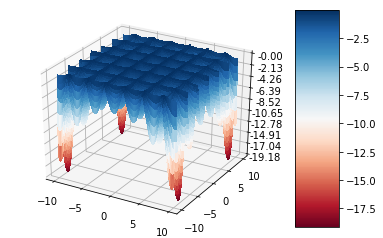

In [0]:
#Τυπώνουμε τη τρισδιάστατη εικόνα της συνάρτησης

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, aspect=5)

plt.show()

In [0]:
#Ορισμός μέσω της βιβλιοθήκης deap των fitness και individual

import random
from deap import base, creator, tools, algorithms

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [0]:
#Ορισμός των απαραίτητων συναρτήσεων που θα χρησιμοποιηθούν παρακάτω στα toolboxes

def evalSinFunc(indiv):
    result = (-1*abs(sin(indiv[0])*cos(indiv[1])*exp(abs(1-sqrt(indiv[0]**2+indiv[1]**2)/pi))))
    return (result,)

MIN_BOUND = np.array([-10.0]*numVariables)
MAX_BOUND = np.array([10.0]*numVariables)


#feasible: Επιστρέφει αν μια λύση-τιμή είναι εκτός πεδίου ορισμού
def feasible(indiv):
    if any(indiv < MIN_BOUND) or any(indiv > MAX_BOUND):
        return False
    return True

#istance: καθορίζει την κοστολόγηση του αποτελέσματος-λύσης που είναι εκτός πεδίου ορισμού   
def distance(indiv):
    dist = 0.0
    for i in range (len(indiv)) :
        penalty = 0
        if (indiv[i] < MIN_BOUND[i]): penalty = -10.0 - indiv[i]
        if (indiv[i] > MAX_BOUND[i]): penalty = indiv[i] - 10.0
        dist = dist + penalty
    return dist

In [0]:
#Ορίζουμε όλα τα δυνατά toolboxes για high/low πιθανότητα mate/mutation και για 2 tournsize.

toolbox_list=[]

for i in range(32): #common fields in toolboxes
    toolbox = base.Toolbox()
    
    # Attribute generator 
    toolbox.register("attr_float", random.uniform, -10.0, 10.0)
    # Structure initializers
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, numVariables) #2d func - 2 genes
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evalSinFunc)
    toolbox.decorate("evaluate", tools.DeltaPenality (feasible, 10.0, distance))
    toolbox_list.append(toolbox)


operators = []

##### cxUniform, mutShuffleIndexes
##### tournament:3
toolbox_list[0].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[0].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[0].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform low, mutShuffleIndexes low,select low")

toolbox_list[1].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[1].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[1].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform high, mutShuffleIndexes low,select low")

toolbox_list[2].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[2].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[2].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform low, mutShuffleIndexes high,select low")

toolbox_list[3].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[3].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[3].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform high, mutShuffleIndexes high,select low")

##### tournament:10
toolbox_list[4].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[4].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[4].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform low, mutShuffleIndexes low,select high")

toolbox_list[5].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[5].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[5].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform high, mutShuffleIndexes low,select high")

toolbox_list[6].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[6].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[6].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform low, mutShuffleIndexes high,select high")

toolbox_list[7].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[7].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[7].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform high, mutShuffleIndexes high,select high")


##### cxBlend, mutShuffleIndexes
##### tournament:3
toolbox_list[8].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[8].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[8].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend low, mutShuffleIndexes low,select low")

toolbox_list[9].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[9].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[9].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend high, mutShuffleIndexes low,select low")

toolbox_list[10].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[10].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[10].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend low, mutShuffleIndexes high,select low")

toolbox_list[11].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[11].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[11].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend high, mutShuffleIndexes high,select low")

##### tournament:10
toolbox_list[12].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[12].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[12].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend low, mutShuffleIndexes low,select high")

toolbox_list[13].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[13].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[13].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend high, mutShuffleIndexes low,select high")

toolbox_list[14].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[14].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[14].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend low, mutShuffleIndexes high,select high")

toolbox_list[15].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[15].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[15].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend high, mutShuffleIndexes high,select high")



##### cxUniform, mutGaussian
##### tournament:3
toolbox_list[16].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[16].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[16].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform low, mutGaussian low,select low")

toolbox_list[17].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[17].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[17].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform high, mutGaussian low,select low")

toolbox_list[18].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[18].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[18].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform low, mutGaussian high,select low")

toolbox_list[19].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[19].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[19].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform high, mutGaussian high,select low")

##### tournament:10
toolbox_list[20].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[20].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[20].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform low, mutGaussian low,select high")

toolbox_list[21].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[21].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[21].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform high, mutGaussian low,select high")

toolbox_list[22].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[22].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[22].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform low, mutGaussian high,select high")

toolbox_list[23].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[23].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[23].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform high, mutGaussian high,select high")


##### cxBlend, mutGaussian
##### tournament:3
toolbox_list[24].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[24].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[24].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend low, mutGaussian low,select low")

toolbox_list[25].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[25].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[25].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend high, mutGaussian low,select low")

toolbox_list[26].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[26].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[26].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend low, mutGaussian high,select low")

toolbox_list[27].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[27].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[27].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend high, mutGaussian high,select low")

##### tournament:10
toolbox_list[28].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[28].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[28].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend low, mutGaussian low,select high")

toolbox_list[29].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[29].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[29].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend high, mutGaussian low,select high")

toolbox_list[30].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[30].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[30].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend low, mutGaussian high,select high")

toolbox_list[31].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[31].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[31].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend high, mutGaussian high,select high")

In [0]:
#Ορισμός διαφόρων βοηθητικών συναρτήσεων, όπου για τον κάθε αλγόριθμο εκτυπώνουν
#τις τιμές των υπερπαραμέτρων που μας ενδιαφέρουν και την απόδοση του αλγορίθμου.
#Βάζουμε κάποιες default τιμές για πληθυσμό, πιθ. μετάλλαξη, πιθ. διασταύρωσης, 
#πλήθους γενεών και μ,λ όπου χρειάζεται.

import numpy
%matplotlib inline
import matplotlib.pyplot as plt
        
    
def eaSimple_with_stats(N=100, CXPB=0.5, MUTPB=0.2, NGEN=100):    
    pop = toolbox.population(n=N)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    strategy="eaSimple "+str(N)   
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=False)
    
    return pop, logbook, hof,strategy



def eaMuPlusLambda_with_stats(N=100, MU=40, LAMBDA=60, CXPB=0.5, MUTPB=0.2, NGEN=100):
    pop = toolbox.population(n=N)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    strategy="eaMuPlusLambda "+str(N)+" "+str(MU)+" "+str(LAMBDA)
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=False)
    
    return pop, logbook, hof,strategy


def eaMuCommaLambda_with_stats(N=100, MU=40, LAMBDA=60, CXPB=0.5, MUTPB=0.2, NGEN=100):
    pop = toolbox.population(n=N)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    strategy="eaMuCommaLambda "+str(N)+" "+str(MU)+" "+str(LAMBDA)

    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=False)

    return pop, logbook, hof,strategy


In [0]:
#Επιπλεόν βοηθητικές συναρτήσεις για εμφάνιση αποτελεσμάτων. Καλούν τις παραπάνω συναρτήσεις.

import time

GOAL = -19.2085 #Σημείο ισορροπίας αυτής της συνάρτησης
DELTA = 0.000003

#Εξετάζει αν η λύση είναι αρκετά κοντά στο στόχο. 
def is_valid(min_val):
    return ((min_val > GOAL - DELTA) and (min_val < GOAL + DELTA))

#Βοηθητική συνάρτηση για μετρικές.
def metrics_calc_in_round(nevals, min_, successes, avg_min_arr, avg_evals_arr, 
                          suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr):
    round_min = min(min_)
    avg_min_arr.append(round_min) #best for this round
    avg_evals_arr.append(sum(nevals)) #evals for this round

    if (is_valid(round_min)):
        successes = successes + 1

    for j in range(len(min_)):
        if (is_valid(min_[j])):
            suc_avg_gen_arr.append(j)
            suc_avg_min_arr.append(min_[j])
            suc_avg_evals_arr.append(sum(avg_evals_arr[:j]))
            break
            
    return avg_min_arr, avg_evals_arr, successes, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr


#algorithm_many_rounds: τρέχει για όσους γύρους επιβάλλουμε (max_rounds) έναν συγκεκριμένο 
#από τους 3 αλγορίθμους που εξετάζουμε (algorithm = 0 <-> (Simple), algorithm =1 <-> (m+l), 
#algorithm =2 <->(m,l)). 
#Δέχεται όλες τις παρακάτω υπερπαραμέτρους και δίνει ως έξοδο τις ζητούμενες μετρικές.
def algorithm_many_rounds(algorithm=0, max_rounds=10, POP=100, NGEN=100,CXPB=0.8, MUTPB=0.2, MU=40, LAMBDA=60): #algorthm: 0 (Simple), 1 (m+l), 2 (m,l)
    avg_min_arr = []
    avg_evals_arr = []
    avg_time_arr = []
    suc_avg_gen_arr = []
    suc_avg_min_arr = []
    suc_avg_evals_arr = []
    successes = 0
    
    if algorithm == 0: #eaSimple
        for i in range(max_rounds):
            start_time = time.time()
            pop, log, hof,strategy = eaSimple_with_stats(N=POP, NGEN=NGEN,CXPB=CXPB,MUTPB=MUTPB)    
            avg_time_arr.append(time.time() - start_time)
            gen, nevals, avg, min_, max_ = log.select("gen", "nevals", "avg", "min", "max")
            avg_min_arr, avg_evals_arr, successes, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr = metrics_calc_in_round(nevals, min_, successes, avg_min_arr, avg_evals_arr, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr)
    
    elif algorithm == 1: #eaMuPlusLambda
        for i in range(max_rounds):
            start_time = time.time()
            pop, log, hof,strategy = eaMuPlusLambda_with_stats(N=POP, NGEN=NGEN,CXPB=CXPB,MUTPB=MUTPB,MU=MU,LAMBDA=LAMBDA)    
            avg_time_arr.append(time.time() - start_time)
            gen, nevals, avg, min_, max_ = log.select("gen", "nevals", "avg", "min", "max")
            avg_min_arr, avg_evals_arr, successes, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr = metrics_calc_in_round(nevals, min_, successes, avg_min_arr, avg_evals_arr, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr)
    
    elif algorithm == 2: #eaMuCommaLambda
        for i in range(max_rounds):
            start_time = time.time()
            pop, log, hof,strategy = eaMuCommaLambda_with_stats(N=POP, NGEN=NGEN,CXPB=CXPB,MUTPB=MUTPB,MU=MU,LAMBDA=LAMBDA)    
            avg_time_arr.append(time.time() - start_time)
            gen, nevals, avg, min_, max_ = log.select("gen", "nevals", "avg", "min", "max")
            avg_min_arr, avg_evals_arr, successes, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr = metrics_calc_in_round(nevals, min_, successes, avg_min_arr, avg_evals_arr, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr)
    else:
        print("algorithm value should be 0,1 or 2")
    
    #Υπολογισμός μέσων όρων
    avg_evals = sum(avg_evals_arr) / max_rounds
    avg_min = sum(avg_min_arr) / max_rounds
    avg_time = sum(avg_time_arr) / max_rounds 
    
    #Μέσοι όροι για επαναλήψεις που επιτύχαν
    if (len(suc_avg_gen_arr) > 0):
        suc_avg_gen = sum(suc_avg_gen_arr) / successes
        suc_avg_min = sum(suc_avg_min_arr) / successes
        suc_avg_evals = sum(suc_avg_evals_arr) / successes
    else:
        suc_avg_gen = None
        suc_avg_min = None
        suc_avg_evals = None
    strategy=strategy+" "+str(CXPB)+" "+str(MUTPB)    
    return avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals,strategy

In [0]:
#Ορισμός κλάσης για μετρικές που χρειάζεται να εμφανίσουμε στον τελικό πίνακα παρακάτω.

import pandas as pd

class Metrics:
    
    
    def __init__(self):
        self.avg_evals = []
        self.avg_time = []
        self.avg_min = []
        self.suc_avg_min = []
        self.suc_avg_evals = []
        self.suc_avg_gen = []
        self.successes=[]    
        self.table=[]
    
    #Εκτύπωση με το μορφότυπο που ζητείται για όλα τα toolboxes
    def pretty_print(self, operators, strategies):
        oper=[]
        for i in range(32):
            for j in range(3):
                oper.append(operators[i])

        d = {'operator': oper,
             'strategy': strategies,
             'successes': self.successes,
             's.avg.min': self.suc_avg_min,
             's.avg.evals': self.suc_avg_evals,
             's.avg.gens': self.suc_avg_gen,
             'avg.evals': self.avg_evals,
             'avg.min': self.avg_min,
             'avg_time': self.avg_time
            }
        df = pd.DataFrame(data=d)
        return df
    
    #Εκτύπωση με το μορφότυπο που ζητείται για το βέλτιστο toolbox
    def pretty_print_opt(self, strategies):             
        d = {'strategy': strategies,
             'successes': self.successes,
             's.avg.min': self.suc_avg_min,
             's.avg.evals': self.suc_avg_evals,
             's.avg.gens': self.suc_avg_gen,
             'avg.evals': self.avg_evals,
             'avg.min': self.avg_min,
             'avg_time': self.avg_time
            }
        df = pd.DataFrame(data=d)
        return df

In [0]:
#Υπολογισμός όλων των μετρικών όλων των toolboxes με τους 3 αλγορίθμους.

if __name__ == "__main__":
    strategies=[]
    metrics_lists = Metrics()
    for oper in range(32):
        for algo in range(3):
            toolbox=toolbox_list[oper]
            avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals,strategy = algorithm_many_rounds(algo, 5,NGEN=100,POP=300,MU=100,LAMBDA=200)
            metrics_lists.avg_min.append(avg_min)
            metrics_lists.avg_evals.append(avg_evals)
            metrics_lists.avg_time.append(avg_time)
            metrics_lists.successes.append(successes)
            metrics_lists.suc_avg_min.append(suc_avg_min)
            metrics_lists.suc_avg_evals.append(suc_avg_evals)
            metrics_lists.suc_avg_gen.append(suc_avg_gen)
            strategies.append(strategy)

In [0]:
#Εκτύπωση των παραπάνω αποτελεσμάτων για να εξάγουμε το βέλτιστο συνδυασμό.

pd.set_option('display.max_rows', 500)
table=metrics_lists.pretty_print(operators,strategies)
table


operator  \
0     cxUniform low, mutShuffleIndexes low,select low   
1     cxUniform low, mutShuffleIndexes low,select low   
2     cxUniform low, mutShuffleIndexes low,select low   
3    cxUniform high, mutShuffleIndexes low,select low   
4    cxUniform high, mutShuffleIndexes low,select low   
5    cxUniform high, mutShuffleIndexes low,select low   
6    cxUniform low, mutShuffleIndexes high,select low   
7    cxUniform low, mutShuffleIndexes high,select low   
8    cxUniform low, mutShuffleIndexes high,select low   
9   cxUniform high, mutShuffleIndexes high,select low   
10  cxUniform high, mutShuffleIndexes high,select low   
11  cxUniform high, mutShuffleIndexes high,select low   
12   cxUniform low, mutShuffleIndexes low,select high   
13   cxUniform low, mutShuffleIndexes low,select high   
14   cxUniform low, mutShuffleIndexes low,select high   
15  cxUniform high, mutShuffleIndexes low,select high   
16  cxUniform high, mutShuffleIndexes low,select high   
17  cxUniform high, mutShuffleIndexes low,select high   
18  cxUniform low, mutShuffleIndexes high,select high   
19  cxUniform low, mutShuffleIndexes high,select high   
20  cxUniform low, mutShuffleIndexes high,select high   
21  cxUniform high, mutShuffleIndexes high,select ...   
22  cxUniform high, mutShuffleIndexes high,select ...   
23  cxUniform high, mutShuffleIndexes high,select ...   
24      cxBlend low, mutShuffleIndexes low,select low   
25      cxBlend low, mutShuffleIndexes low,select low   
26      cxBlend low, mutShuffleIndexes low,select low   
27     cxBlend high, mutShuffleIndexes low,select low   
28     cxBlend high, mutShuffleIndexes low,select low   
29     cxBlend high, mutShuffleIndexes low,select low   
30     cxBlend low, mutShuffleIndexes high,select low   
31     cxBlend low, mutShuffleIndexes high,select low   
32     cxBlend low, mutShuffleIndexes high,select low   
33    cxBlend high, mutShuffleIndexes high,select low   
34    cxBlend high, mutShuffleIndexes high,select low   
35    cxBlend high, mutShuffleIndexes high,select low   
36     cxBlend low, mutShuffleIndexes low,select high   
37     cxBlend low, mutShuffleIndexes low,select high   
38     cxBlend low, mutShuffleIndexes low,select high   
39    cxBlend high, mutShuffleIndexes low,select high   
40    cxBlend high, mutShuffleIndexes low,select high   
41    cxBlend high, mutShuffleIndexes low,select high   
42    cxBlend low, mutShuffleIndexes high,select high   
43    cxBlend low, mutShuffleIndexes high,select high   
44    cxBlend low, mutShuffleIndexes high,select high   
45   cxBlend high, mutShuffleIndexes high,select high   
46   cxBlend high, mutShuffleIndexes high,select high   
47   cxBlend high, mutShuffleIndexes high,select high   
48          cxUniform low, mutGaussian low,select low   
49          cxUniform low, mutGaussian low,select low   
50          cxUniform low, mutGaussian low,select low   
51         cxUniform high, mutGaussian low,select low   
52         cxUniform high, mutGaussian low,select low   
53         cxUniform high, mutGaussian low,select low   
54         cxUniform low, mutGaussian high,select low   
55         cxUniform low, mutGaussian high,select low   
56         cxUniform low, mutGaussian high,select low   
57        cxUniform high, mutGaussian high,select low   
58        cxUniform high, mutGaussian high,select low   
59        cxUniform high, mutGaussian high,select low   
60         cxUniform low, mutGaussian low,select high   
61         cxUniform low, mutGaussian low,select high   
62         cxUniform low, mutGaussian low,select high   
63        cxUniform high, mutGaussian low,select high   
64        cxUniform high, mutGaussian low,select high   
65        cxUniform high, mutGaussian low,select high   
66        cxUniform low, mutGaussian high,select high   
67        cxUniform low, mutGaussian high,select high   
68        cxUniform low, mutGaussian high,select high   
69       cxUniform high, mutGaussian high,select high  

Τα γενικά συμπεράσματα που βγαίνουν είναι ότι για να προχωρήσει κοντά στη λύση ο γενετικός αλγόριθμος χρειάζεται αρκετό "ταρακούνημα" στα γονίδια του. Δηλάδη θέλει έντονη ανάμειξη και αλλαγή των γονιδίων. Αυτό γίνεται ξεκάθαρο αν δούμε ότι οι αρχικοί operators, ανεξαρτήτου στρατηγικής δεν καταφέρνουν να φτάσουν κοντά στη λύση. Αυτοί είναι που έχουν τελεστή διασταύρωσης uniform και μετάλλαξης mutShuffleIndexes , όπου υποθέτουμε ότι δεν κάνουν αρκετή αλλαγή στα γονίδια(τόσο σε Low όσο και σε High). Πρακτικά ικανοποιητικά αποτελέσματα  αρχίζουμε να βλέπουμε όταν κάνει την εμφάνιση του ο τελεστή διασταύρωσης Blend, διατηρώντας παρόλαυτα τη μετάλλαξη mutShuffleIndexes. Αρα αυτά τα δύο (mutShuffleIndexes και uniform) μαζί δεν είναι καλός συνδυασμός στο συνάρτηση μας. Παρόμοια αποτελέσματα αν και ελαφρά καλύτερα παρουσιάζονται πάλι για τελεστή διασταύρωσης uniform αλλά με μετάλλαξη mutGaussian.  Έτσι καταλήγουμε ότι γενικά ο τελεστής διασταύρωσης unirform, δεν είναι καλός σε αυτή τη συνάρτηση.
Μερικοί συνδυασμοί που βρίσκουν τη λύση είναι αυτοί με αριθμό: 84,87,90,45,42 όπου όλοι έχουν κοινό τη στρατηγική eaSimple, τους πάρα πολλούς υπολογισμούς συνάρτησης καταλληλότητας (eval) περίπου 25.000 και μεγάλο σχετικά χρόνο εκτέλεσης. Αυτό είναι και λογικό λόγω του τρόπου όπου δημιουργείται και "αναπαράγεται" ο πληθυσμός στη στρατηγική αυτή. Αντίθετα στης άλλες δύο στρατηγικές έχουμε πιο μειωμένο αριθμό υπολογισμό συνάρτησης καταλληλότητας (eval) λόγω της αναπαραγωγικής στρατηγικής της κάθε μίας.

In [0]:
#Εδώ τυπώνουμε όλα όσα βρήκαν την απάντηση μας μέσα στο όριο του Δ, σε όλους τους γύρους,
#για να συγκρίνουμε και να κρατήσουμε το καλύτερο

def best_metrics_pd(table,metrics,goal,opBool):
    suc=metrics.successes
    index=[]
    for i in range(len(suc)):
        if(suc[i]==goal):
            index.append(i)

    np_df = table.as_matrix() 
    t=[]
    for j in index:
        t.append(np_df[j])
    if(opBool):    
        x=pd.DataFrame(data=t,columns=['operators','strategy','successes',
                                       's.avg.min','s.avg.evals','s.avg.gens','avg.evals','avg.min','avg.time'])
    else:
        x=pd.DataFrame(data=t,columns=['strategy','successes',
                                       's.avg.min','s.avg.evals','s.avg.gens','avg.evals','avg.min','avg.time'])
    
        
    return x,index

table_,index=best_metrics_pd(table,metrics_lists,5,True)
table_


/home/gxx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


operators  \
0      cxBlend low, mutShuffleIndexes low,select low   
1      cxBlend low, mutShuffleIndexes low,select low   
2      cxBlend low, mutShuffleIndexes low,select low   
3     cxBlend high, mutShuffleIndexes low,select low   
4     cxBlend high, mutShuffleIndexes low,select low   
5     cxBlend high, mutShuffleIndexes low,select low   
6     cxBlend low, mutShuffleIndexes high,select low   
7     cxBlend low, mutShuffleIndexes high,select low   
8    cxBlend high, mutShuffleIndexes high,select low   
9    cxBlend high, mutShuffleIndexes high,select low   
10   cxBlend high, mutShuffleIndexes high,select low   
11    cxBlend low, mutShuffleIndexes low,select high   
12    cxBlend low, mutShuffleIndexes low,select high   
13    cxBlend low, mutShuffleIndexes low,select high   
14   cxBlend high, mutShuffleIndexes low,select high   
15   cxBlend high, mutShuffleIndexes low,select high   
16   cxBlend high, mutShuffleIndexes low,select high   
17   cxBlend low, mutShuffleIndexes high,select high   
18  cxBlend high, mutShuffleIndexes high,select high   
19  cxBlend high, mutShuffleIndexes high,select high   
20           cxBlend low, mutGaussian low,select low   
21           cxBlend low, mutGaussian low,select low   
22           cxBlend low, mutGaussian low,select low   
23          cxBlend high, mutGaussian low,select low   
24          cxBlend high, mutGaussian low,select low   
25          cxBlend high, mutGaussian low,select low   
26          cxBlend low, mutGaussian high,select low   
27          cxBlend low, mutGaussian high,select low   
28          cxBlend low, mutGaussian high,select low   
29         cxBlend high, mutGaussian high,select low   
30         cxBlend high, mutGaussian high,select low   
31         cxBlend high, mutGaussian high,select low   
32          cxBlend low, mutGaussian low,select high   
33          cxBlend low, mutGaussian low,select high   
34          cxBlend low, mutGaussian low,select high   
35         cxBlend high, mutGaussian low,select high   
36         cxBlend high, mutGaussian low,select high   
37         cxBlend high, mutGaussian low,select high   
38         cxBlend low, mutGaussian high,select high   
39         cxBlend low, mutGaussian high,select high   
40         cxBlend low, mutGaussian high,select high   
41        cxBlend high, mutGaussian high,select high   
42        cxBlend high, mutGaussian high,select high   
43        cxBlend high, mutGaussian high,select high   

                               strategy  successes  s.avg.min  s.avg.evals  \
0                  eaSimple 300 0.8 0.2          5 -19.208501      76671.8   
1    eaMuPlusLambda 300 100 200 0.8 0.2          5 -19.208500      60900.0   
2   eaMuCommaLambda 300 100 200 0.8 0.2          5 -19.208499      60900.0   
3                  eaSimple 300 0.8 0.2          5 -19.208500      76492.2   
4    eaMuPlusLambda 300 100 200 0.8 0.2          5 -19.208500      60900.0   
5   eaMuCommaLambda 300 100 200 0.8 0.2          5 -19.208500      60900.0   
6                  eaSimple 300 0.8 0.2          5 -19.208499      76534.2   
7    eaMuPlusLambda 300 100 200 0.8 0.2          5 -19.208501      60900.0   
8                  eaSimple 300 0.8 0.2          5 -19.208498      76374.0   
9    eaMuPlusLambda 300 100 200 0.8 0.2          5 -19.208499      60900.0   
10  eaMuCommaLambda 300 100 200 0.8 0.2          5 -19.208499      60900.0   
11                 eaSimple 300 0.8 0.2          5 -19.208500      76523.6   
12   eaMuPlusLambda 300 100 200 0.8 0.2          5 -19.208500      60900.0   
13  eaMuCommaLambda 300 100 200 0.8 0.2          5 -19.208500      60900.0   
14                 eaSimple 300 0.8 0.2          5 -19.208501      76584.2   
15   eaMuPlusLambda 300 100 200 0.8 0.2          5 -19.208499      60900.0   
16  eaMuCommaLambda 300 100 200 0.8 0.2          5 -19.208501      60900.0   
17                 eaSimple 300 0.8 0.2          5 -19.208500      76350.2   
18                 eaSimple 300 0.8 0.2 

In [0]:
#Επιλογή opt_index και άρα toolbox και στρατηγικής σύμφωνα με τον παραπάνω πίνακα

opt_index= 95 # correspons to index[43]
print("opt_index_=",opt_index)
opt_operator_index=opt_index%32
opt_strategy_index=opt_index%3
print("operator_opt_index=",opt_operator_index,"stategy_opt_index=",opt_strategy_index )

opt_index_= 95
operator_opt_index= 31 stategy_opt_index= 2


Παρατηρούμε ότι καλύτερος είναι o συνδυασμός με αριθμό 43 σε αυτό το πίνακα.
Αντιστοιχεί στον αριθμό 95 στον αρχικό πίνακα. Διαλέγουμε αυτή τη συγκεκριμένη διάταξη καθώς συγκριτικά με τις υπόλοιπες έχει τόσο μικρό αριθμό μέσων γενεών αλλά και αποτιμήσεων αλλά και χρόνο εκτέλεσης. Αν τα προαναφερθήσα με στρατηγική eaSimple, είχαν μικρότερο χρόνο εκτέλεσης και λιγότερες αποτιμήσεις θα διαλέγαμε κάποιο από αυτά καθώς φτάνουν στη λύση νωρίτερα από το συγκεκριμένο όσο αφορά γενιές.
Διαλέξαμε το 43 αντί π.χ 40 ή 37(στον αμέσως από πάνω πίνακα), καθώς δοκιμάσαμε και τους τρείς για πολλές επαναλήψεις με διαφορετικές πιθανότητες και ήταν το καλύτερο από τα 3.
Άρα βέλτιστη διάταξη είναι:
**cxBlend high, mutGaussian high,select high eaMuCommaLambda**
<br/> 
Αυτή θα χρησιμοποιήσουμε για βελτιστοποίηση όσο αφορά της πιθανότητες μετάλλαξης και διασταύρωσης.

In [0]:
#Βελτιστοποίηση στις πιθανότητες μετάλλαξης και διασταύρωσης

if __name__ == "__main__":
    strategies_opt=[]
    opt_rounds=15
    metrics_lists_opt_n = Metrics()
    toolbox=toolbox_list[opt_operator_index]
    prob=[0.05 ,0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.9] 
    for cxP in prob:
        for muP in prob:
            if(cxP+muP<1):
                avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals,strategy = algorithm_many_rounds(opt_strategy_index, opt_rounds,NGEN=150,POP=300,CXPB=cxP, MUTPB=muP,MU=100,LAMBDA=200)
                metrics_lists_opt_n.avg_min.append(avg_min)
                metrics_lists_opt_n.avg_evals.append(avg_evals)
                metrics_lists_opt_n.avg_time.append(avg_time)
                metrics_lists_opt_n.successes.append(successes)
                metrics_lists_opt_n.suc_avg_min.append(suc_avg_min)
                metrics_lists_opt_n.suc_avg_evals.append(suc_avg_evals)
                metrics_lists_opt_n.suc_avg_gen.append(suc_avg_gen)
                strategies_opt.append(strategy)

In [0]:
opt_table=metrics_lists_opt_n.pretty_print_opt(strategies_opt)
opt_table

strategy  successes  s.avg.min  \
0   eaMuCommaLambda 300 100 200 0.05 0.05          2 -19.208501   
1   eaMuCommaLambda 300 100 200 0.05 0.15          6 -19.208501   
2   eaMuCommaLambda 300 100 200 0.05 0.25         11 -19.208500   
3   eaMuCommaLambda 300 100 200 0.05 0.35         13 -19.208500   
4   eaMuCommaLambda 300 100 200 0.05 0.45         12 -19.208501   
5   eaMuCommaLambda 300 100 200 0.05 0.55         14 -19.208499   
6   eaMuCommaLambda 300 100 200 0.05 0.65         13 -19.208500   
7   eaMuCommaLambda 300 100 200 0.05 0.75         14 -19.208499   
8   eaMuCommaLambda 300 100 200 0.05 0.85         15 -19.208500   
9    eaMuCommaLambda 300 100 200 0.05 0.9          5 -19.208499   
10  eaMuCommaLambda 300 100 200 0.15 0.05         11 -19.208499   
11  eaMuCommaLambda 300 100 200 0.15 0.15         14 -19.208499   
12  eaMuCommaLambda 300 100 200 0.15 0.25         13 -19.208499   
13  eaMuCommaLambda 300 100 200 0.15 0.35         14 -19.208500   
14  eaMuCommaLambda 300 100 200 0.15 0.45         14 -19.208500   
15  eaMuCommaLambda 300 100 200 0.15 0.55         15 -19.208500   
16  eaMuCommaLambda 300 100 200 0.15 0.65         15 -19.208500   
17  eaMuCommaLambda 300 100 200 0.15 0.75         15 -19.208500   
18  eaMuCommaLambda 300 100 200 0.25 0.05         15 -19.208500   
19  eaMuCommaLambda 300 100 200 0.25 0.15         13 -19.208500   
20  eaMuCommaLambda 300 100 200 0.25 0.25         14 -19.208500   
21  eaMuCommaLambda 300 100 200 0.25 0.35         15 -19.208500   
22  eaMuCommaLambda 300 100 200 0.25 0.45         15 -19.208500   
23  eaMuCommaLambda 300 100 200 0.25 0.55         15 -19.208500   
24  eaMuCommaLambda 300 100 200 0.25 0.65         15 -19.208500   
25  eaMuCommaLambda 300 100 200 0.35 0.05         15 -19.208501   
26  eaMuCommaLambda 300 100 200 0.35 0.15         15 -19.208501   
27  eaMuCommaLambda 300 100 200 0.35 0.25         15 -19.208501   
28  eaMuCommaLambda 300 100 200 0.35 0.35         15 -19.208499   
29  eaMuCommaLambda 300 100 200 0.35 0.45         15 -19.208500   
30  eaMuCommaLambda 300 100 200 0.35 0.55         15 -19.208500   
31  eaMuCommaLambda 300 100 200 0.45 0.05         15 -19.208500   
32  eaMuCommaLambda 300 100 200 0.45 0.15         14 -19.208501   
33  eaMuCommaLambda 300 100 200 0.45 0.25         15 -19.208501   
34  eaMuCommaLambda 300 100 200 0.45 0.35         15 -19.208499   
35  eaMuCommaLambda 300 100 200 0.45 0.45         15 -19.208500   
36  eaMuCommaLambda 300 100 200 0.55 0.05         14 -19.208500   
37  eaMuCommaLambda 300 100 200 0.55 0.15         15 -19.208501   
38  eaMuCommaLambda 300 100 200 0.55 0.25         15 -19.208501   
39  eaMuCommaLambda 300 100 200 0.55 0.35         15 -19.208501   
40  eaMuCommaLambda 300 100 200 0.65 0.05         15 -19.208501   
41  eaMuCommaLambda 300 100 200 0.65 0.15         15 -19.208500   
42  eaMuCommaLambda 300 100 200 0.65 0.25         15 -19.208500   
43  eaMuCommaLambda 300 100 200 0.75 0.05         15 -19.208501   
44  eaMuCommaLambda 300 100 200 0.75 0.15         15 -19.208500   
45  eaMuCommaLambda 300 100 200 0.85 0.05         15 -19.208501   
46   eaMuCommaLambda 300 100 200 0.9 0.05         15 -19.208501   

      s.avg.evals  s.avg.gens     avg.evals    avg.min  avg_time  
0    16423.000000  136.000000   3304.866667 -19.208383  0.529478  
1    32526.333333   85.166667   6312.666667 -19.208462  0.728970  
2    72801.454545   67.363636   9317.733333 -19.208498  0.815886  
3   104059.615385   67.846154  12303.600000 -19.208498  1.004359  
4   121451.500000   48.916667  15324.933333 -19.208500  1.181367  
5   142439.071429   41.571429  18290.333333 -19.208501  1.315696  
6   169208.461538   37.461538  21337.200000 -19.208499  1.565944  
7   203159.071429   36.928571  24312.266667 -19.208502  1.654430  
8   218235.666667   34.533333  27283.866667 -19.208503  1.888210  
9   276570.800000   70.400000  28812.333333 -19.208491  1.949398  
10   42348.363636   20.818182   6282.533333 -19.208391  0.798300  
11   72189.0

In [0]:
#Αφήνουμε μόνο αυτά που βρήκαν τη λύση σε όλους τους γύρους, δηλαδή είχαν 15 successes
#Ουσιαστικά τα ξαναεμφανίζουμε για να μας είναι πιο εύκολο να κάνουμε την τελική επιλογή
#αλλά διατηρούμε και το index των επιτυχημένων.

table_,x=best_metrics_pd(opt_table,metrics_lists_opt_n,opt_rounds,False)
table_


/home/gxx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


strategy  successes  s.avg.min  \
0   eaMuCommaLambda 300 100 200 0.05 0.85         15 -19.208500   
1   eaMuCommaLambda 300 100 200 0.15 0.55         15 -19.208500   
2   eaMuCommaLambda 300 100 200 0.15 0.65         15 -19.208500   
3   eaMuCommaLambda 300 100 200 0.15 0.75         15 -19.208500   
4   eaMuCommaLambda 300 100 200 0.25 0.05         15 -19.208500   
5   eaMuCommaLambda 300 100 200 0.25 0.35         15 -19.208500   
6   eaMuCommaLambda 300 100 200 0.25 0.45         15 -19.208500   
7   eaMuCommaLambda 300 100 200 0.25 0.55         15 -19.208500   
8   eaMuCommaLambda 300 100 200 0.25 0.65         15 -19.208500   
9   eaMuCommaLambda 300 100 200 0.35 0.05         15 -19.208501   
10  eaMuCommaLambda 300 100 200 0.35 0.15         15 -19.208501   
11  eaMuCommaLambda 300 100 200 0.35 0.25         15 -19.208501   
12  eaMuCommaLambda 300 100 200 0.35 0.35         15 -19.208499   
13  eaMuCommaLambda 300 100 200 0.35 0.45         15 -19.208500   
14  eaMuCommaLambda 300 100 200 0.35 0.55         15 -19.208500   
15  eaMuCommaLambda 300 100 200 0.45 0.05         15 -19.208500   
16  eaMuCommaLambda 300 100 200 0.45 0.25         15 -19.208501   
17  eaMuCommaLambda 300 100 200 0.45 0.35         15 -19.208499   
18  eaMuCommaLambda 300 100 200 0.45 0.45         15 -19.208500   
19  eaMuCommaLambda 300 100 200 0.55 0.15         15 -19.208501   
20  eaMuCommaLambda 300 100 200 0.55 0.25         15 -19.208501   
21  eaMuCommaLambda 300 100 200 0.55 0.35         15 -19.208501   
22  eaMuCommaLambda 300 100 200 0.65 0.05         15 -19.208501   
23  eaMuCommaLambda 300 100 200 0.65 0.15         15 -19.208500   
24  eaMuCommaLambda 300 100 200 0.65 0.25         15 -19.208500   
25  eaMuCommaLambda 300 100 200 0.75 0.05         15 -19.208501   
26  eaMuCommaLambda 300 100 200 0.75 0.15         15 -19.208500   
27  eaMuCommaLambda 300 100 200 0.85 0.05         15 -19.208501   
28   eaMuCommaLambda 300 100 200 0.9 0.05         15 -19.208501   

      s.avg.evals  s.avg.gens     avg.evals    avg.min  avg.time  
0   218235.666667   34.533333  27283.866667 -19.208503  1.888210  
1   170371.933333   25.466667  21310.533333 -19.208503  1.557184  
2   190988.133333   16.133333  24283.666667 -19.208503  1.902595  
3   218497.666667   17.533333  27308.066667 -19.208503  2.001090  
4    74643.400000   32.466667   9327.666667 -19.208502  1.106902  
5   137962.866667   12.866667  18315.133333 -19.208502  1.521467  
6   163323.533333   14.533333  21309.866667 -19.208503  1.632051  
7   194405.666667   21.666667  24295.066667 -19.208503  1.795967  
8   218466.200000   14.600000  27297.466667 -19.208503  1.980752  
9    91246.266667   14.266667  12316.866667 -19.208503  1.322885  
10  115477.066667   14.600000  15328.066667 -19.208503  1.374607  
11  137623.066667   14.666667  18282.000000 -19.208503  1.505494  
12  156206.400000   12.266667  21310.600000 -19.208502  1.654646  
13  176609.666667   12.066667  24288.000000 -19.208503  1.916667  
14  198259.000000   12.000000  27285.266667 -19.208503  1.996100  
15  111198.800000   19.133333  15308.266667 -19.208503  1.363619  
16  161999.000000   26.200000  21299.933333 -19.208503  1.695740  
17  175101.866667   11.066667  24309.333333 -19.208503  1.901481  
18  201993.533333   11.466667  27302.533333 -19.208503  2.259939  
19  150388.533333   11.733333  21296.200000 -19.208503  1.878341  
20  176497.000000   10.600000  24293.133333 -19.208503  2.210740  
21  194549.733333   10.933333  27290.800000 -19.208503  2.041633  
22  150370.666667    9.800000  21281.533333 -19.208503  1.655932  
23  178493.466667   10.800000  24339.800000 -19.208503  2.191200  
24  198449.533333    9.933333  27313.600000 -19.208503  2.013417  
25  170194.266667   10.466667  24299.066667 -19.208503  1.940643  
26  192845.666667   12.800000  27284.933333 -19.208503  2.266391  
27  191066.200000   10.066667  27310.333333 -19.208503  2.151205  
28  207481.866667   10.333333  28807.333333 -19.208503  2.223892

Όπως βλέπουμε το καλύτερο από τις διάφορες πιθανότητες που χρησιμοποιήσαμε σαν πιθανότητες μετάλλαξης και διασταύρωσης, είναι πιθ.διασταύρωσης=0.65 και μετάλλαξης=0.05, δηλαδή ο συνδυασμός με αριθμό 22 στο πιο πάνω πίνακα.
Διαλέξαμε αυτό σαν το καλύτερο καθώς είχε βρεί τη λύση σε όλους τους γύρους αλλά και επειδη βρίσκει τη λύση πιο γρήγορα από όλους τους καλούς σε 10 περίπου γενιές.
<br/> 
Στη συνέχεια επιχείρούμε ένα πιο κοντίνο "grid search" στη προσπάθεια να βρούμε τις τελικές βέλτιστες πιθανότητες μετάλλαξης και διασταύρωσης.

In [0]:
#Βελτιστοποίηση στις πιθανότητες μετάλλαξης και διασταύρωσης

if __name__ == "__main__":
    strategies_opt_final=[]
    opt_rounds=15
    metrics_lists_opt_final = Metrics()
    probCX=[0.61,0.63,0.65,0.67,0.69] 
    probMU=[0.05,0.07,0.09] 

    for cxP in probCX:
        for muP in probMU:
            if(cxP+muP<1):
                toolbox=toolbox_list[opt_operator_index]
                avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals,strategy = algorithm_many_rounds(opt_strategy_index, opt_rounds,NGEN=150,POP=400,CXPB=cxP, MUTPB=muP,MU=150,LAMBDA=250)
                metrics_lists_opt_final.avg_min.append(avg_min)
                metrics_lists_opt_final.avg_evals.append(avg_evals)
                metrics_lists_opt_final.avg_time.append(avg_time)
                metrics_lists_opt_final.successes.append(successes)
                metrics_lists_opt_final.suc_avg_min.append(suc_avg_min)
                metrics_lists_opt_final.suc_avg_evals.append(suc_avg_evals)
                metrics_lists_opt_final.suc_avg_gen.append(suc_avg_gen)
                strategies_opt_final.append(strategy)

In [0]:
#Εκτύπωση των παραπάνω αποτελεσμάτων

opt_table_final=metrics_lists_opt_final.pretty_print_opt(strategies_opt_final)
opt_table_final

strategy  successes  s.avg.min  \
0   eaMuCommaLambda 400 150 250 0.61 0.05         15 -19.208500   
1   eaMuCommaLambda 400 150 250 0.61 0.07         15 -19.208501   
2   eaMuCommaLambda 400 150 250 0.61 0.09         15 -19.208501   
3   eaMuCommaLambda 400 150 250 0.63 0.05         15 -19.208501   
4   eaMuCommaLambda 400 150 250 0.63 0.07         15 -19.208500   
5   eaMuCommaLambda 400 150 250 0.63 0.09         15 -19.208501   
6   eaMuCommaLambda 400 150 250 0.65 0.05         15 -19.208500   
7   eaMuCommaLambda 400 150 250 0.65 0.07         15 -19.208501   
8   eaMuCommaLambda 400 150 250 0.65 0.09         15 -19.208501   
9   eaMuCommaLambda 400 150 250 0.67 0.05         15 -19.208501   
10  eaMuCommaLambda 400 150 250 0.67 0.07         15 -19.208500   
11  eaMuCommaLambda 400 150 250 0.67 0.09         15 -19.208501   
12  eaMuCommaLambda 400 150 250 0.69 0.05         15 -19.208501   
13  eaMuCommaLambda 400 150 250 0.69 0.07         15 -19.208500   
14  eaMuCommaLambda 400 150 250 0.69 0.09         15 -19.208500   

      s.avg.evals  s.avg.gens     avg.evals    avg.min  avg_time  
0   172601.066667    9.800000  25132.066667 -19.208503  1.991822  
1   186541.133333   10.333333  25913.933333 -19.208503  2.071878  
2   188723.800000   10.200000  26682.533333 -19.208503  2.196548  
3   187858.666667   10.000000  25876.266667 -19.208503  2.012056  
4   181309.133333   11.866667  26681.533333 -19.208502  1.943955  
5   197295.666667   18.400000  27407.200000 -19.208503  2.412111  
6   186735.000000   10.800000  26683.466667 -19.208503  3.103532  
7   200781.066667   10.333333  27399.200000 -19.208503  3.443544  
8   193448.266667   10.000000  28157.133333 -19.208503  3.813993  
9   198925.533333   11.866667  27360.133333 -19.208503  2.890944  
10  200690.000000   10.000000  28139.133333 -19.208503  3.031763  
11  196495.666667   10.266667  28891.866667 -19.208503  2.964360  
12  187508.666667    9.533333  28109.933333 -19.208503  3.609208  
13  192839.266667    9.400000  28924.266667 -19.208503  3.652529  
14  213303.333333   10.533333  29630.400000 -19.208503  3.299986

In [0]:
#Τυπώνουμε πάλι τους καλύτερους που βρίσκουν όλες τις απαντήσεις.
#Ουσιαστικά τα ξαναεμφανίζουμε για να μας είναι πιο εύκολο να κάνουμε την τελική επιλογή
#αλλά διατηρούμε και το index των επιτυχημένων.

table_,x=best_metrics_pd(opt_table_final,metrics_lists_opt_final,opt_rounds,False)
table_

/home/gxx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


strategy  successes  s.avg.min  \
0   eaMuCommaLambda 400 150 250 0.61 0.05         15 -19.208500   
1   eaMuCommaLambda 400 150 250 0.61 0.07         15 -19.208501   
2   eaMuCommaLambda 400 150 250 0.61 0.09         15 -19.208501   
3   eaMuCommaLambda 400 150 250 0.63 0.05         15 -19.208501   
4   eaMuCommaLambda 400 150 250 0.63 0.07         15 -19.208500   
5   eaMuCommaLambda 400 150 250 0.63 0.09         15 -19.208501   
6   eaMuCommaLambda 400 150 250 0.65 0.05         15 -19.208500   
7   eaMuCommaLambda 400 150 250 0.65 0.07         15 -19.208501   
8   eaMuCommaLambda 400 150 250 0.65 0.09         15 -19.208501   
9   eaMuCommaLambda 400 150 250 0.67 0.05         15 -19.208501   
10  eaMuCommaLambda 400 150 250 0.67 0.07         15 -19.208500   
11  eaMuCommaLambda 400 150 250 0.67 0.09         15 -19.208501   
12  eaMuCommaLambda 400 150 250 0.69 0.05         15 -19.208501   
13  eaMuCommaLambda 400 150 250 0.69 0.07         15 -19.208500   
14  eaMuCommaLambda 400 150 250 0.69 0.09         15 -19.208500   

      s.avg.evals  s.avg.gens     avg.evals    avg.min  avg.time  
0   172601.066667    9.800000  25132.066667 -19.208503  1.991822  
1   186541.133333   10.333333  25913.933333 -19.208503  2.071878  
2   188723.800000   10.200000  26682.533333 -19.208503  2.196548  
3   187858.666667   10.000000  25876.266667 -19.208503  2.012056  
4   181309.133333   11.866667  26681.533333 -19.208502  1.943955  
5   197295.666667   18.400000  27407.200000 -19.208503  2.412111  
6   186735.000000   10.800000  26683.466667 -19.208503  3.103532  
7   200781.066667   10.333333  27399.200000 -19.208503  3.443544  
8   193448.266667   10.000000  28157.133333 -19.208503  3.813993  
9   198925.533333   11.866667  27360.133333 -19.208503  2.890944  
10  200690.000000   10.000000  28139.133333 -19.208503  3.031763  
11  196495.666667   10.266667  28891.866667 -19.208503  2.964360  
12  187508.666667    9.533333  28109.933333 -19.208503  3.609208  
13  192839.266667    9.400000  28924.266667 -19.208503  3.652529  
14  213303.333333   10.533333  29630.400000 -19.208503  3.299986

Το καλύτερο είναι αυτό που βγάζει σωστή απάντηση σε όλους τους γύρους και χρειάζεται ελάχιστο αριθμό γενιών για να τη βρει περίπου 10. Είναι ο συνδυασμός με αριθμό στο πιο πάνω πίνακα 0. Δηλαδή πιθ.διασταύρωσης=0.61 και μετάλλαξης=0.05. 
Διαλέξαμε αυτό μεταξύ των 0,12,13, καθώς αν και δεν έχει τον μικρότερο μέσω αριθμό γενιών έχει πολύ κοντά στο μικρότερο αλλά ο μέσος χρόνος εκτέλεσης είναι αρκετά μικρότερος όπως και ο αριθμός των αποτιμήσεων.
Όποιο από αυτούς τους τρεις συνδυασμούς διαλέγαμε θα είχαμε αρκετά βέλτιστο αποτέλεσμα - λύση.
Έτσι ο καλύτερος συνδυασμός τελεστών, και πιθανοτήτων διασταύρωσης και μετάλλαξης είναι : 
<br/>
**cxBlend high, mutGaussian high,select high eaMuCommaLambda Πιθ.διασταύρωσης=0.61 Πιθ.μετάλλαξης=0.05**


In [0]:
#Εκτέλεση του βέλτιστου συνδυασμού με βέλτιστες πιθανότητες μετάλλαξης και διασταύρωσης
#σε μεγάλο αριθμό πληθυσμού και γενιών για να προσεγγίσουμε καλυτερα τη λύση

if __name__ == "__main__":
    opt_final = Metrics()  
    opt_final_strat=[]
    toolbox=toolbox_list[31]#[opt_operator_index]
    avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals,strategy = algorithm_many_rounds(2, 1,NGEN=450,POP=700,CXPB=0.61, MUTPB=0.05,MU=250,LAMBDA=450)
    opt_final.avg_min.append(avg_min)
    opt_final.avg_evals.append(avg_evals)
    opt_final.avg_time.append(avg_time)
    opt_final.successes.append(successes)
    opt_final.suc_avg_min.append(suc_avg_min)
    opt_final.suc_avg_evals.append(suc_avg_evals)
    opt_final.suc_avg_gen.append(suc_avg_gen)
    opt_final_strat.append(strategy)
    pop, logbook, hof,strategy=eaMuCommaLambda_with_stats(N=700,MU=250,LAMBDA=450, CXPB=0.61, MUTPB=0.05, NGEN=450)

    
    

In [0]:
print("optimal solution=",hof[0].fitness)
opt_final.pretty_print_opt(opt_final_strat)


optimal solution= (-19.208502567886754,)


strategy  successes  s.avg.min  s.avg.evals  \
0  eaMuCommaLambda 700 250 450 0.61 0.05          1 -19.208501     134500.0   

   s.avg.gens  avg.evals    avg.min   avg_time  
0        11.0   134500.0 -19.208503  10.810685

Όπως παρατηρούμε τα αποτελέσματα παραμένουν ίδια. Ήδη από πριν είχαμε βέλτιστη προσέγγιση του σημείου ισορροπίας άρα στη συγκεκριμένη περίπτωση δεν είναι ανάγκη να έχουμε τόσο μεγάλο πλήθος γενεών και πληθυσμού.